## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset - csv file

In [140]:
df = pd.read_csv("train.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


## Exploratory Data Analysis

In [4]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Check for Null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
# Count of Null values in Postal Code
null_count = df['Postal Code'].isnull().sum()
print(null_count)

0


In [8]:
# Fill Null values in Postal Code with 0
df['Postal Code'] = df['Postal Code'].fillna(0) 
# Or 
# df['Postal Code'].fillna(0, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Changing the data type of 'Postal Code' column from float data type to Integer, as this column doesn't contain any decimal value

In [13]:
# Convert data type of Postal Code column
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
# Statistical View of numeric data types
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


As 75% of the sales is under 210. So, We can assume maximum value of sales comes under Outliers  

## Data Cleaning

In [15]:
# Checking for duplicate data using conditional statements
if df.duplicated().sum() > 0:
    print("Duplicates are present")
else:
    print("No duplicates exist")

No duplicates exist


We have no duplicate data in this datset

In [20]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [21]:
#Another way
df.duplicated(keep=False).sum()

np.int64(0)

## Customer Analysis

We can segment the sales with respect to different kinds of customers we have in this dataset.

In [ ]:
# Distinct type of Customers
type_of_customers = df['Segment'].unique()
print(type_of_customers)

To better understand our sales performance and customer behavior, we have segmented our sales data based on different customer types: **Consumer**, **Corporate**, and **Home Office**. This segmentation helps us identify key patterns and trends within each customer group, allowing us to tailor our marketing strategies and improve customer satisfaction.

In [37]:
# Number of customers in each segment
no_of_customers = df['Segment'].value_counts().reset_index()

# Rename column names
no_of_customers = no_of_customers.rename(columns = {'Segment':'Customer Type', 'count':'Total Customers'})
print(no_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


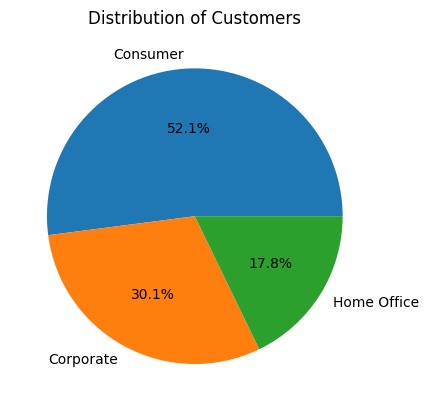

In [43]:
# Plotting pie chart
plt.pie(no_of_customers['Total Customers'], labels = no_of_customers['Customer Type'], autopct='%1.1f%%')

# Label 
plt.title("Distribution of Customers")
plt.show()

In [44]:
# Grouping Customer Type to get Total Sales against each type
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()

# Rename Columns 
sales_per_category = sales_per_category.rename(columns={'Segment': 'Customer Type', 'Sales':'Total Sales'})
print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


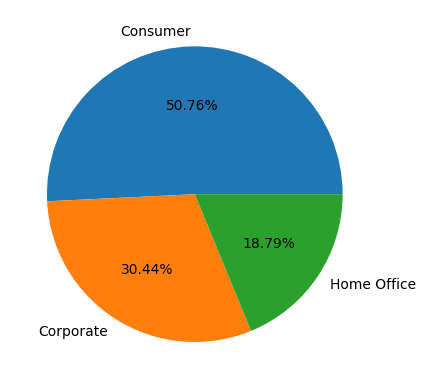

In [46]:
# Plotting pie chart
plt.pie(sales_per_category['Total Sales'], labels = sales_per_category['Customer Type'], autopct = '%1.2f%%')
plt.title('Sales by Customer Type')
plt.show()

Upon analyzing our customer data, we observe a significant correlation between the number of customers in each category and the total sales generated by that category. This correlation highlights the importance of understanding the composition of our customer base and tailoring our strategies accordingly.

## Customer Behaviour

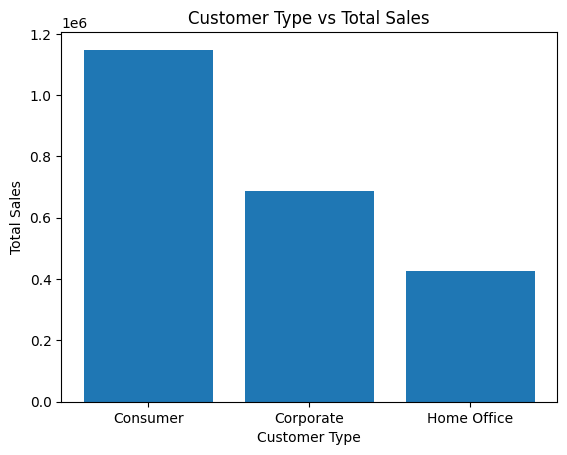

In [51]:
# Plotting bar graph
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])

# Label
plt.title('Customer Type vs Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.show()

In [90]:
# Group data according to Customer ID, Customer Name, Segment and calculate the frequency of their orders
customer_order = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename Order ID column
customer_order.rename(columns = {'Order ID' : 'Total Orders'}, inplace = True)

# Repeat Customers
repeat_customers = customer_order[customer_order['Total Orders'] > 1]
print(customer_order)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


In [63]:
#Sort the repeated customers in descending order
sort_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending = False)
print(sort_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    MA-17560         Matt Abelman  Home Office            34
2    PP-18955           Paul Prost  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


## Customer Ranking wrt Sales

In [64]:
# Group data by Customer ID and Customer Name and find the sum of sales for each unique customer
customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()

# Sort by highest number of spending/sales and display top 10 customers, who spend the most amount of money 
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Sales
0    SM-20320         Sean Miller  25043.050
1    TC-20980        Tamara Chand  19052.218
2    RB-19360        Raymond Buch  15117.339
3    TA-21385        Tom Ashbrook  14595.620
4    AB-10105       Adrian Barton  14473.571
5    KL-16645        Ken Lonsdale  14175.229
6    SC-20095        Sanjit Chand  14142.334
7    HL-15040        Hunter Lopez  12873.298
8    SE-20110        Sanjit Engle  12209.438
9    CC-12370  Christopher Conant  12129.072


## Preferred Modes of Shipment Analysis

In [68]:
# Different types of shipping method
types_of_shipping = df['Ship Mode'].unique()
print(types_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [76]:
# Frequency of these shipping types
shipping_mode = df['Ship Mode'].value_counts().reset_index()
print(shipping_mode)

        Ship Mode  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


In [78]:
# Rename the columns
shipping_mode = shipping_mode.rename(columns= {'count':'Use Frequency'}) 
print(shipping_mode)

        Ship Mode  Use Frequency
0  Standard Class           5859
1    Second Class           1902
2     First Class           1501
3        Same Day            538


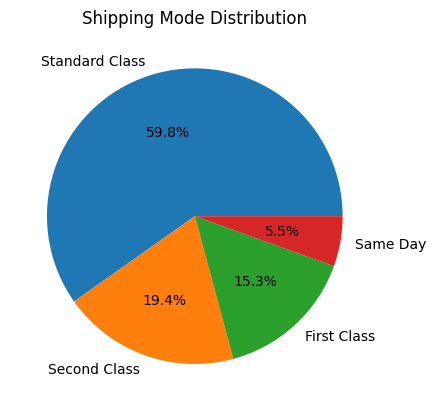

In [79]:
# Plotting pie chart
plt.pie(shipping_mode['Use Frequency'], labels = shipping_mode['Ship Mode'],autopct = '%1.1f%%')

# Label
plt.title("Shipping Mode Distribution")
plt.show()

Upon analyzing the shipment data, it is evident that the Standard Class mode of shipment is the most preferred option among customers. This is followed by the other three modes of shipment, indicating a clear preference hierarchy.

The analysis shows a descending order of preference among these modes, indicating varied customer needs and preferences that might be influenced by factors such as urgency, cost, and availability.

## Geographical Analysis of Customers and Sales

In [86]:
# Customers by State
state = df['State'].value_counts().reset_index()

# Rename thec column which displays count of customers from each state
state = state.rename(columns={'count':'No. of Customers'})

# Top 10 States with maximum number of customers 
print(state.head(10))

            State  No. of Customers
0      California              1946
1        New York              1097
2           Texas               973
3    Pennsylvania               582
4      Washington               504
5        Illinois               483
6            Ohio               454
7         Florida               373
8        Michigan               253
9  North Carolina               247


In [88]:
# Customers by City
city = df['City'].value_counts().reset_index()

# Rename thec column which displays count of customers from each city
city = city.rename(columns={'count':'No. of Customers'})

# Top 10 cities with maximum number of customers 
print(city.head(10))

            City  No. of Customers
0  New York City               891
1    Los Angeles               728
2   Philadelphia               532
3  San Francisco               500
4        Seattle               426
5        Houston               374
6        Chicago               308
7       Columbus               221
8      San Diego               170
9    Springfield               161


In [95]:
# Sales per State
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sort Sales with highest sales on top 
state_sales_sorted = state_sales.sort_values(by = 'Sales', ascending = False)

# Top 10 states
print(state_sales_sorted.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [96]:
# Sales per City
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sort city with highest sales on top 
city_sales_sorted = city_sales.sort_values(by = 'Sales', ascending = False)

# Top 10 city
print(city_sales_sorted.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


New York and Los Angeles(California) have the most number of customers and sales

## Product Analysis

In [98]:
# Get distinct types of product category 
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [141]:
# Sub-category count
sub_category_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# Sort by count of Sub-Category in each Category
sub_category_count = sub_category_count.sort_values(by = 'Sub-Category', ascending = False)
print(sub_category_count.reset_index(drop = True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [103]:
# Sales by Category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
print(category_sales)

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


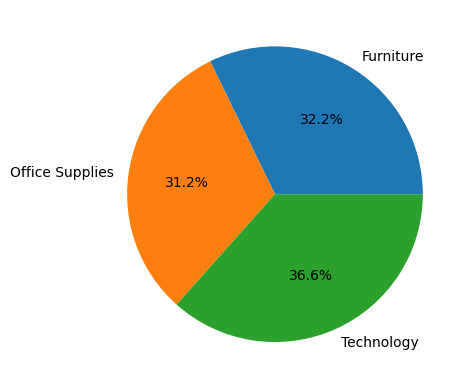

In [104]:
# Plotting pie chart
plt.pie(category_sales['Sales'], labels = category_sales['Category'], autopct = '%1.1f%%')
plt.show()

The sales data reveals a balanced distribution among the three main product categories: Technology, Office Supplies, and Furniture. With Technology slightly leading at 36% and the other two categories each contributing 32%, this equilibrium presents an opportunity to maintain a holistic approach in our sales, marketing, and product development strategies, ensuring sustained growth and customer satisfaction across all categories.

In [105]:
# Sales by Product Sub-Category 

In [111]:
# Group by Product Sub-Category
prdct_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

#Sorting by Sales
sorted_prdct_subcategory = prdct_subcategory.sort_values(by = 'Sales', ascending = False)

# Top 10 Sub-Category 
print(sorted_prdct_subcategory.head(10).reset_index(drop=True))

  Sub-Category        Sales
0       Phones  327782.4480
1       Chairs  322822.7310
2      Storage  219343.3920
3       Tables  202810.6280
4      Binders  200028.7850
5     Machines  189238.6310
6  Accessories  164186.7000
7      Copiers  146248.0940
8    Bookcases  113813.1987
9   Appliances  104618.4030


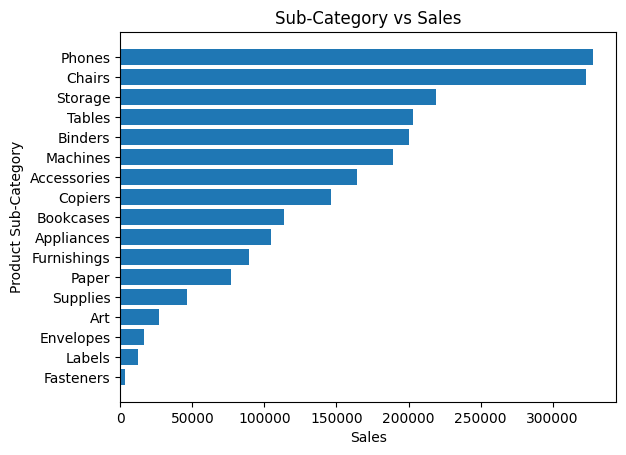

In [116]:
# Plotting Horizontal Bar Graph 
sorted_prdct_subcategory = prdct_subcategory.sort_values(by = 'Sales', ascending = True)

plt.barh(sorted_prdct_subcategory['Sub-Category'], sorted_prdct_subcategory['Sales'])

# Label
plt.title("Sub-Category vs Sales")
plt.ylabel('Product Sub-Category')
plt.xlabel('Sales')
plt.show()

Our sales data indicates that certain products stand out in terms of popularity and volume. Notably, Phones, Chairs, Tables, and Storage solutions are the highest sold products across our inventory.

## Sales

In [129]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Yearly Sales
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns = {'Order Date':'Year', 'Sales':'Total Sales'})

# Sort Yearly Sales
sorted_yearly_sales = yearly_sales.sort_values(by = 'Total Sales', ascending = False)
print(sorted_yearly_sales.reset_index(drop = True))

   Year  Total Sales
0  2018  722052.0192
1  2017  600192.5500
2  2015  479856.2081
3  2016  459436.0054


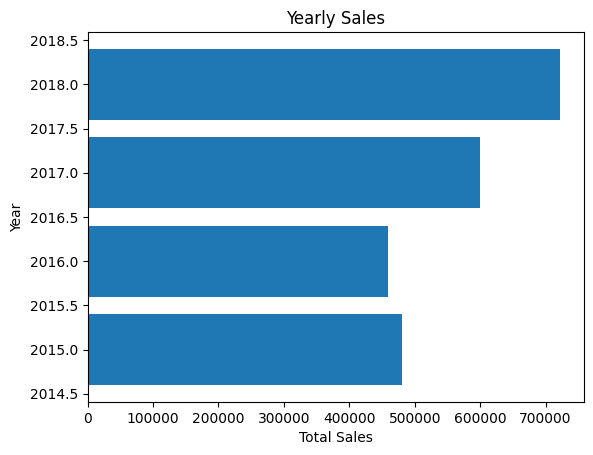

In [137]:
# Plotting Horizontal Graph 
sorted_yearly_sales = yearly_sales.sort_values(by = 'Total Sales', ascending = True)

plt.barh(sorted_yearly_sales['Year'], sorted_yearly_sales['Total Sales'])

# Label
plt.title("Yearly Sales")
plt.ylabel('Year')
plt.xlabel('Total Sales')
plt.show()

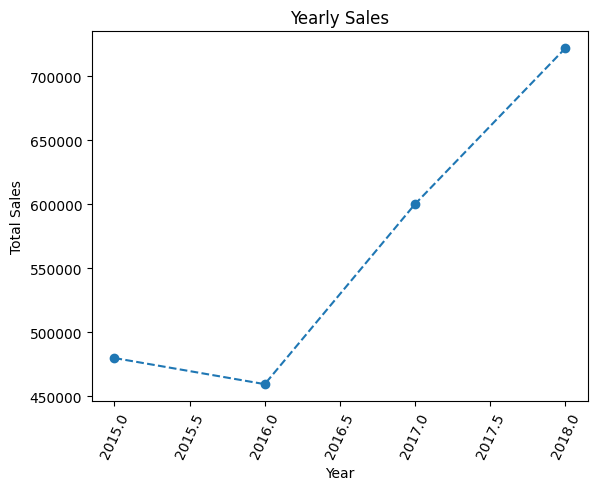

In [139]:
# Plotting Line Graph for the same
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()

## Quarterly Sales Analysis

## 2018

In [146]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Filter data according to date
yearly_sales = df[df['Order Date'].dt.year == 2018]

# Quarterly Sales for 2018 
quarterly_sales = yearly_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()

# Rename Columns
quarterly_sales = quarterly_sales.rename(columns = {'Order Date':'Quarter', 'Sales':'Total Sales'})

print('This is quarterly sales for 2018')
print(quarterly_sales)

This is quarterly sales for 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


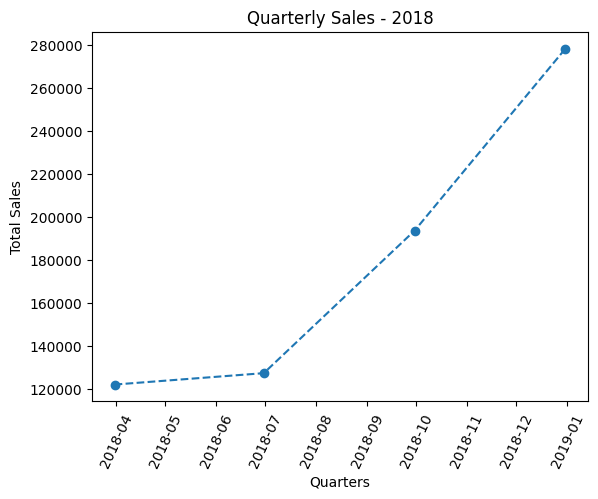

In [152]:
# Plotting line graph 
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label 
plt.title('Quarterly Sales - 2018')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()

In a similar fashion, we do it for other years too 

## 2017

In [153]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Filter data according to date
yearly_sales = df[df['Order Date'].dt.year == 2017]

# Quarterly Sales for 2018 
quarterly_sales = yearly_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()

# Rename Columns
quarterly_sales = quarterly_sales.rename(columns = {'Order Date':'Quarter', 'Sales':'Total Sales'})

print('This is quarterly sales for 2017')
print(quarterly_sales)

This is quarterly sales for 2017
     Quarter  Total Sales
0 2017-03-31   92686.3650
1 2017-06-30  135061.1610
2 2017-09-30  138056.3742
3 2017-12-31  234388.6498


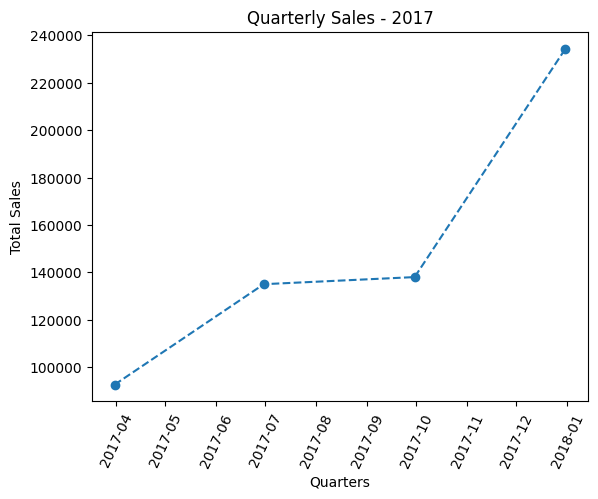

In [154]:
# Plotting line graph 
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label 
plt.title('Quarterly Sales - 2017')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()

## 2016

In [155]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Filter data according to date
yearly_sales = df[df['Order Date'].dt.year == 2016]

# Quarterly Sales for 2018 
quarterly_sales = yearly_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()

# Rename Columns
quarterly_sales = quarterly_sales.rename(columns = {'Order Date':'Quarter', 'Sales':'Total Sales'})

print('This is quarterly sales for 2016')
print(quarterly_sales)

This is quarterly sales for 2016
     Quarter  Total Sales
0 2016-03-31   62357.6870
1 2016-06-30   87713.3730
2 2016-09-30  128560.2072
3 2016-12-31  180804.7382


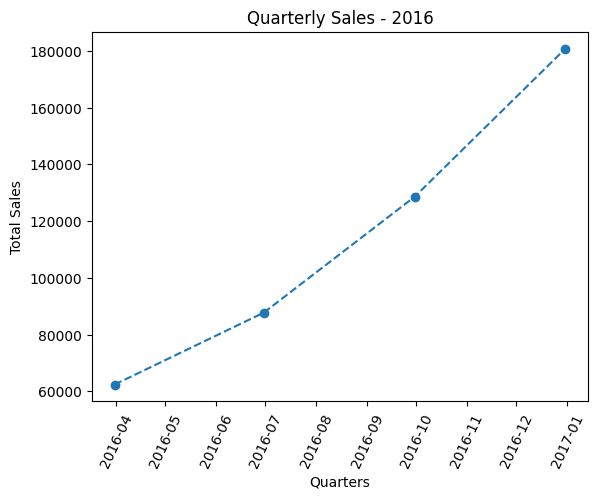

In [156]:
# Plotting line graph 
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label 
plt.title('Quarterly Sales - 2016')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()

## 2015

In [157]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Filter data according to date
yearly_sales = df[df['Order Date'].dt.year == 2015]

# Quarterly Sales for 2018 
quarterly_sales = yearly_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()

# Rename Columns
quarterly_sales = quarterly_sales.rename(columns = {'Order Date':'Quarter', 'Sales':'Total Sales'})

print('This is quarterly sales for 2015')
print(quarterly_sales)

This is quarterly sales for 2015
     Quarter  Total Sales
0 2015-03-31   73931.3960
1 2015-06-30   85874.0936
2 2015-09-30  142522.6063
3 2015-12-31  177528.1122


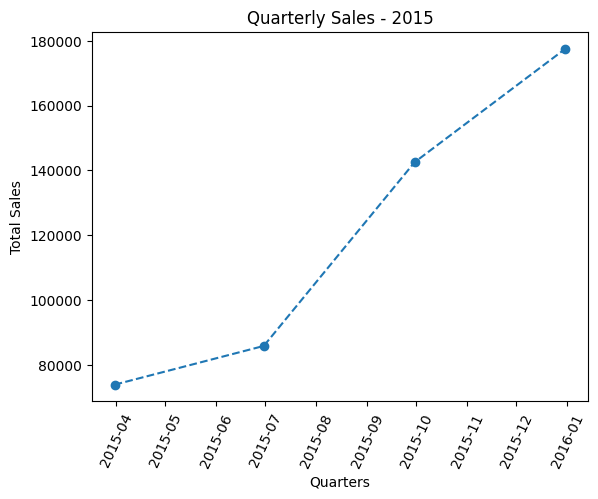

In [158]:
# Plotting line graph 
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label 
plt.title('Quarterly Sales - 2015')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()

Upon examining the sales data from 2015 to 2018, a consistent pattern emerges. Sales show a significant upward trend starting in the third quarter each year. This steep rise in sales is observed across all four years—2015, 2016, 2017, and 2018.

## Monthly Sales Analysis 

## 2018

In [160]:
# Convert Order Date to Date-Time format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)  

# Filter data according to date
yearly_sales = df[df['Order Date'].dt.year == 2018]

# Quarterly Sales for 2018 
monthly_sales = yearly_sales.resample('ME', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()

# Rename Columns
monthly_sales = monthly_sales.rename(columns = {'Order Date':'Quarter', 'Sales':'Total Sales'})

print('This is monthly sales trend for 2018')
print(monthly_sales)

This is monthly sales trend for 2018
      Quarter  Total Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


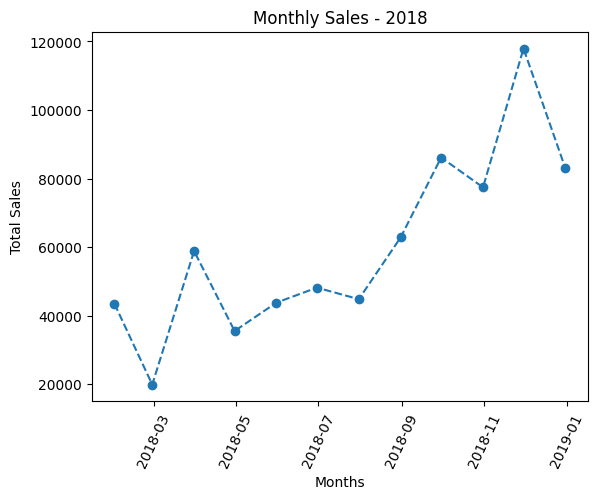

In [162]:
# Plotting line graph 
plt.plot(monthly_sales['Quarter'], monthly_sales['Total Sales'], marker = 'o', linestyle = '--')

# Label 
plt.title('Monthly Sales - 2018')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.xticks(rotation = 65)
plt.show()